In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils import *
from model.data_loader import *
from model.unet_baseline import unet
from model.unet_ternaus import ternausNet16
from model.unet_ternaus_tweaked import ternausNet16_tweaked
from model.unet_pix2pix_paper import unet_pix2pix_paper
from model.unet_pix2pix_pytorch import unet_pix2pix_pytorch

In [3]:
results_pth = 'results/'

In [4]:
models = [
    ['unet_baseline'],
    ['unet_baseline_upsampled'],
    ['unet_pix2pix_paper'],
    ['unet_pix2pix_pytorch'],
    ['unet_ternaus_nopre'],
    ['unet_ternaus'],
    ['unet_ternaus_drop'],
    ['unet_ternaus_bn'],
    ['unet_ternaus_dropbn']
]

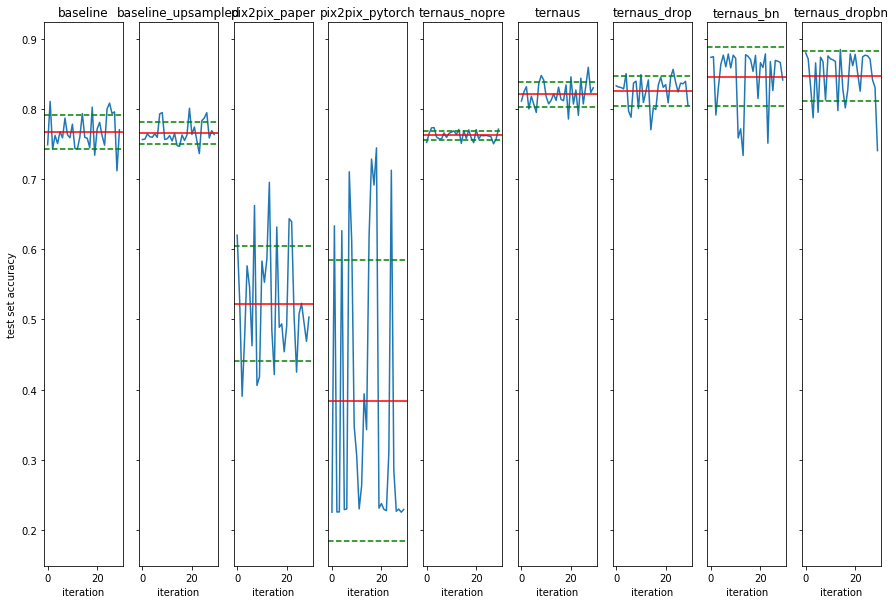

In [5]:
def mean_std(df, column:str):
    """Get mean and upper/lower bounds of variance"""
    mean = df[column].mean()
    upper = mean + df[column].std()
    lower = mean - df[column].std()
    return mean, upper, lower

rows = 1
cols = 9
metric = 'acc'
f, axes = plt.subplots(rows, cols, sharey=True, figsize=(15, 10))

for i in range(cols):
    title = f'{models[i][0]}'
    df = pd.read_csv(f'{results_pth}{title}_50steps.csv')
    mean, upper, lower = mean_std(df, metric)
    axes[i].set_title(title[5:])
    axes[i].plot(list(df.index), list(df[metric]))
    axes[i].axhline(y=mean, color='r')
    axes[i].axhline(y=upper, linestyle='--', color='g')
    axes[i].axhline(y=lower, linestyle='--', color='g')
    axes[i].set_xlabel('iteration')
    if i ==0:
        axes[i].set_ylabel('test set accuracy')

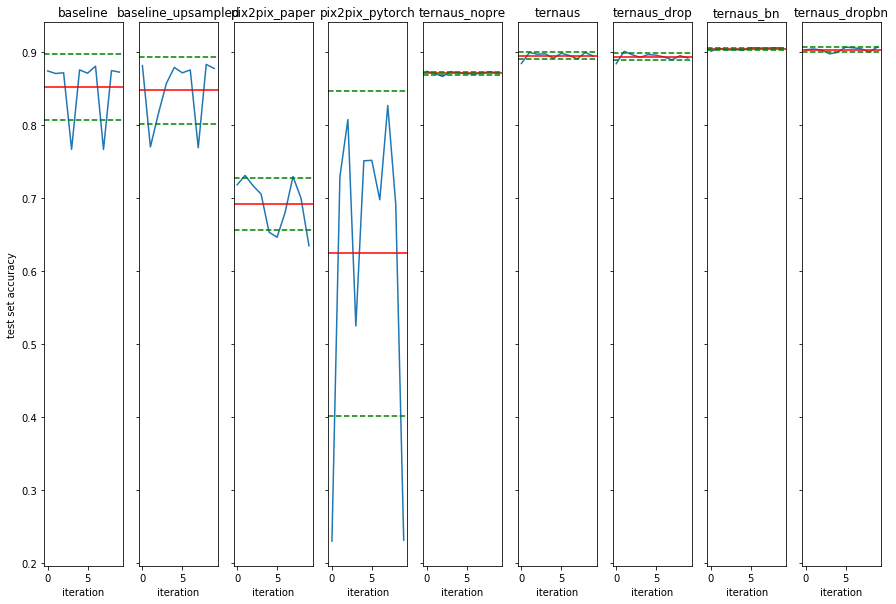

In [7]:
rows = 1
cols = 9
metric = 'acc'

f, axes = plt.subplots(rows, cols, sharey=True, figsize=(15, 10))

for i in range(cols):
    title = f'{models[i][0]}'
    df = pd.read_csv(f'{results_pth}{title}_1000steps.csv')
    mean, upper, lower = mean_std(df, metric)
    axes[i].set_title(title[5:])
    axes[i].plot(list(df.index), list(df[metric]))
    axes[i].axhline(y=mean, color='r')
    axes[i].axhline(y=upper, linestyle='--', color='g')
    axes[i].axhline(y=lower, linestyle='--', color='g')
    axes[i].set_xlabel('iteration')
    if i ==0:
        axes[i].set_ylabel('test set accuracy')

FileNotFoundError: [Errno 2] File b'results/unet_ternaus_nopre_5epochs.csv' does not exist: b'results/unet_ternaus_nopre_5epochs.csv'

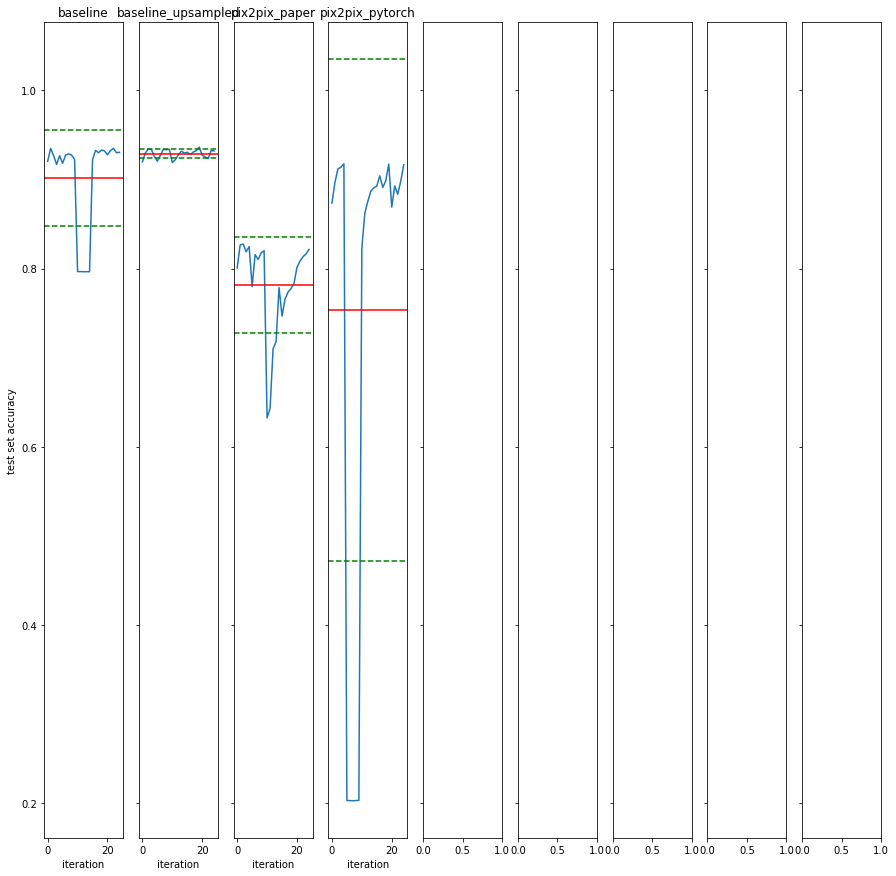

In [7]:
rows = 1
cols = 9
f, axes = plt.subplots(rows, cols, sharey=True, figsize=(15, 15))

for i in range(cols):
    title = f'{models[i][0]}'
    df = pd.read_csv(f'{results_pth}{title}_5epochs.csv')
    mean, upper, lower = mean_std(df, 'val_acc')
    axes[i].set_title(title[5:])
    axes[i].plot(list(df.index), list(df['val_acc']))
    axes[i].axhline(y=mean, color='r')
    axes[i].axhline(y=upper, linestyle='--', color='g')
    axes[i].axhline(y=lower, linestyle='--', color='g')
    axes[i].set_xlabel('iteration')
    if i ==0:
        axes[i].set_ylabel('test set accuracy')